In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
#import json
import random
import os
from data_process import EmbeddingManager


#import os

from evaluation_tool import EvaluationManager

print("creating model")
used_embedding = 'sgns.zhihu.word'
embedding_dir = 'embedding_tensor'
load_cache_model = "model_cache/model"

embedding_manager = EmbeddingManager(used_embedding, embedding_dir)


creating model


In [2]:
# prepare data
print("loading data")
feature_list, target_list = embedding_manager.load_data('traning_data.json')
feature_list_test, target_list_test = embedding_manager.load_data('testing_data.json')


loading data
size 6280 -> 6143
size 320 -> 306


In [3]:
cuda = True
if cuda:

    feature_list = [feature.cuda() for feature in feature_list]
    target_list = [target.cuda() for target in target_list]
    feature_list_test = [feature.cuda() for feature in feature_list_test]
    target_list_test = [target.cuda() for target in target_list_test]

    #model.cuda()


In [4]:
import models

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
embedding_obj = torch.load(os.path.join(embedding_dir, used_embedding))

In [7]:
'''
kernel_num = 100
kernel_sizes = (3,4,5)
dropout = 0.5

model = models.CNNV2(embed_num = 259922, embed_dim = 300, class_num = 2, kernel_num = kernel_num, kernel_sizes = kernel_sizes,
                dropout = dropout)

#embedding_obj = torch.load(os.path.join(embedding_dir, used_embedding))
model.use_pretrained_embedding(embedding_obj['tensor'], non_trainable = True)

if cuda:
    model.cuda()
'''

In [12]:
def create_model(kernel_num = 100, kernel_sizes = (3,4,5), dropout=0.5, cuda=True):
    model = models.CNNV2(embed_num = 259922, embed_dim = 300, class_num = 2, kernel_num = kernel_num, kernel_sizes = kernel_sizes,
                    dropout = dropout)
    model.use_pretrained_embedding(embedding_obj['tensor'], non_trainable = True)

    if cuda:
        model.cuda()
    
    return model


In [16]:
def train_model(model, n_iter = 100000, lr=0.001, record = None):
    # training
    #lr = 0.001
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    len_data = len(feature_list)
    
    if record is None:
        record = {}
    record['loss_seq'] = []

    print("start training")
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
    loss_cache = []
    for i in range(n_iter):
        idx = random.randint(0,len_data-1)
        feature, target = feature_list[idx], target_list[idx]

        optimizer.zero_grad()
        out = model(feature) # before softmax(log_softmax)
        out = out.squeeze(2)
        loss = F.cross_entropy(out, target, size_average=False)
        loss_cache.append(loss.item())
        loss.backward()
        optimizer.step()

        if len(loss_cache) == 1000:
            loss_est = sum(loss_cache)/len(loss_cache)
            loss_cache = []
            print(f'loss: {loss_est} {i}/{n_iter}')
            record['loss_seq'].append(loss_est)
    
    return record
    

In [23]:
def eval_model(model):
    model_train = model.train
    model.train(False)

    evaluation_manager = EvaluationManager(model, embedding_manager, cuda = cuda)
    get_acc = evaluation_manager.get_acc
    confuse_matrix = evaluation_manager.confuse_matrix
    analysis_doc = evaluation_manager.analysis_doc


    print(f'train acc {get_acc(feature_list, target_list)}') # 0.94
    print(confuse_matrix(feature_list, target_list))

    print(f'test acc {get_acc(feature_list_test, target_list_test)}') #
    print(confuse_matrix(feature_list_test, target_list_test))
    
    model.train(model_train)
    print(model.train)


In [11]:
def save_model(model, cache_path = None):
    import datetime
    timestamp = str(datetime.datetime.now()).replace(':','-')
    if cache_path is None:
        cache_path = "model_cache/model"+timestamp
    torch.save(model.state_dict(), cache_path)
    print(f'save cache model {cache_path}')


In [13]:
model345 = create_model(kernel_num = 100, kernel_sizes = (3,4,5), dropout=0.5)

In [17]:
record345 = {}
train_model(model345, record = record345)

start training


D:\anaconda\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loss: 0.5565743560791016 999/100000
loss: 0.5442296116575599 1999/100000
loss: 0.49297299844026565 2999/100000
loss: 0.5138475695848465 3999/100000
loss: 0.5195789534896612 4999/100000
loss: 0.5178411243408918 5999/100000
loss: 0.45958848591148854 6999/100000
loss: 0.5036293657198548 7999/100000
loss: 0.47158551359176637 8999/100000
loss: 0.451208191037178 9999/100000
loss: 0.45861892035603524 10999/100000
loss: 0.48714257951080797 11999/100000
loss: 0.4679399844110012 12999/100000
loss: 0.43058435171842574 13999/100000
loss: 0.4271152044087648 14999/100000
loss: 0.4279901704490185 15999/100000
loss: 0.38167045147717 16999/100000
loss: 0.3788106693327427 17999/100000
loss: 0.40642280665785074 18999/100000
loss: 0.3893596103787422 19999/100000
loss: 0.3618382092565298 20999/100000
loss: 0.3560297166109085 21999/100000
loss: 0.3341560062766075 22999/100000
loss: 0.3459038883149624 23999/100000
loss: 0.3625205486267805 24999/100000
loss: 0.32050370831787584 25999/100000
loss: 0.3153499528

{'loss_seq': [0.5565743560791016,
  0.5442296116575599,
  0.49297299844026565,
  0.5138475695848465,
  0.5195789534896612,
  0.5178411243408918,
  0.45958848591148854,
  0.5036293657198548,
  0.47158551359176637,
  0.451208191037178,
  0.45861892035603524,
  0.48714257951080797,
  0.4679399844110012,
  0.43058435171842574,
  0.4271152044087648,
  0.4279901704490185,
  0.38167045147717,
  0.3788106693327427,
  0.40642280665785074,
  0.3893596103787422,
  0.3618382092565298,
  0.3560297166109085,
  0.3341560062766075,
  0.3459038883149624,
  0.3625205486267805,
  0.32050370831787584,
  0.315349952891469,
  0.31795464900135995,
  0.3353097432106733,
  0.3157678182274103,
  0.2684515957981348,
  0.29727016779780385,
  0.27540214379131794,
  0.32573813951015473,
  0.31374455672502516,
  0.2934187894910574,
  0.28955049441754815,
  0.29206722089648246,
  0.26323159322142603,
  0.2347851779460907,
  0.27107039184868337,
  0.2763147052526474,
  0.2921288164556026,
  0.232692179530859,
  0.2314

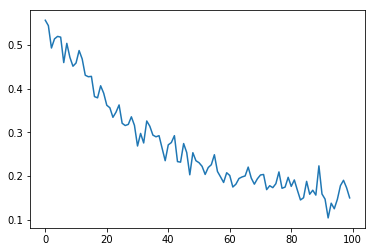

In [21]:
plt.plot(record345['loss_seq'])

In [24]:
eval_model(model345)

train acc 0.9853491779260948
tensor([[4766,   35],
        [  55, 1287]])
test acc 0.761437908496732
tensor([[218,  24],
        [ 49,  15]])
<bound method Module.train of CNNV2(
  (embed): Embedding(259922, 300)
  (convs1): ModuleList(
    (0): Conv2d(1, 100, kernel_size=(3, 300), stride=(1, 1))
    (1): Conv2d(1, 100, kernel_size=(4, 300), stride=(1, 1))
    (2): Conv2d(1, 100, kernel_size=(5, 300), stride=(1, 1))
  )
  (dropout): Dropout(p=0.5)
  (conv2): Conv1d(300, 2, kernel_size=(1,), stride=(1,))
)>


In [25]:
save_model(model345)

save cache model model_cache/model2018-11-25 12-31-12.206807


In [26]:
model34 = create_model(kernel_num = 100, kernel_sizes = (3,4), dropout=0.5)

In [27]:
%%time
record34 = {}
train_model(model34, record = record34)

start training


D:\anaconda\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loss: 0.5732835996747017 999/100000
loss: 0.5432452223896981 1999/100000
loss: 0.4966003338098526 2999/100000
loss: 0.5053496160805225 3999/100000
loss: 0.5090458316504956 4999/100000
loss: 0.4788723462074995 5999/100000
loss: 0.4833341329395771 6999/100000
loss: 0.45614990645647047 7999/100000
loss: 0.4836358630657196 8999/100000
loss: 0.4788308364748955 9999/100000
loss: 0.45717192651331423 10999/100000
loss: 0.4280923751592636 11999/100000
loss: 0.4391767126172781 12999/100000
loss: 0.46015976145863535 13999/100000
loss: 0.40288648402690885 14999/100000
loss: 0.40359081175923345 15999/100000
loss: 0.4261920538395643 16999/100000
loss: 0.3905508672147989 17999/100000
loss: 0.4132982253134251 18999/100000
loss: 0.3922740674614906 19999/100000
loss: 0.39066903953254223 20999/100000
loss: 0.36322362364828586 21999/100000
loss: 0.39194253177940847 22999/100000
loss: 0.3778153987377882 23999/100000
loss: 0.35197713881731035 24999/100000
loss: 0.3424098272919655 25999/100000
loss: 0.349657

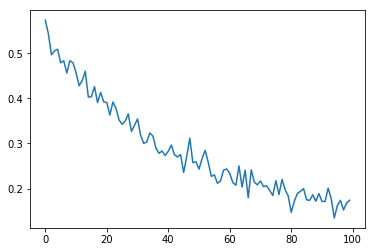

In [28]:
plt.plot(record34['loss_seq'])

In [29]:
eval_model(model34)

train acc 0.980302783656194
tensor([[4786,   15],
        [ 106, 1236]])
test acc 0.7679738562091504
tensor([[222,  20],
        [ 51,  13]])
<bound method Module.train of CNNV2(
  (embed): Embedding(259922, 300)
  (convs1): ModuleList(
    (0): Conv2d(1, 100, kernel_size=(3, 300), stride=(1, 1))
    (1): Conv2d(1, 100, kernel_size=(4, 300), stride=(1, 1))
  )
  (dropout): Dropout(p=0.5)
  (conv2): Conv1d(200, 2, kernel_size=(1,), stride=(1,))
)>


In [30]:
save_model(model34)

save cache model model_cache/model2018-11-25 12-43-45.127202


In [32]:
%%time
model3 = create_model(kernel_num = 100, kernel_sizes = (3,), dropout=0.5)

Wall time: 785 ms


start training


D:\anaconda\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loss: 0.5641817608177662 999/100000
loss: 0.5180348605662585 1999/100000
loss: 0.4788674960322678 2999/100000
loss: 0.4959678508043289 3999/100000
loss: 0.4993215324282646 4999/100000
loss: 0.48864929769933224 5999/100000
loss: 0.4870012004226446 6999/100000
loss: 0.529008617952466 7999/100000
loss: 0.5123358829021454 8999/100000
loss: 0.49176772110164163 9999/100000
loss: 0.4416584071069956 10999/100000
loss: 0.47864444874227047 11999/100000
loss: 0.39750085669755936 12999/100000
loss: 0.47196654284000394 13999/100000
loss: 0.4481651755273342 14999/100000
loss: 0.4299611163437366 15999/100000
loss: 0.41916742478311064 16999/100000
loss: 0.4482549553960562 17999/100000
loss: 0.4113357098698616 18999/100000
loss: 0.40537041184306144 19999/100000
loss: 0.46694341632723807 20999/100000
loss: 0.39957033544778825 21999/100000
loss: 0.3796930588632822 22999/100000
loss: 0.3963094180971384 23999/100000
loss: 0.3915163770914078 24999/100000
loss: 0.39942283821105956 25999/100000
loss: 0.391477

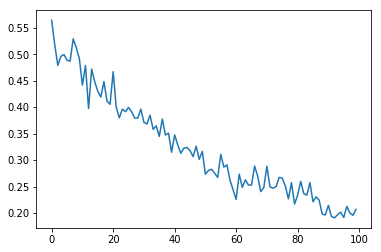

In [33]:
%%time
record3 = {}
train_model(model3, record = record3)
plt.plot(record3['loss_seq'])

In [34]:
%%time
eval_model(model3)
save_model(model3)

train acc 0.9715122904118508
tensor([[4754,   47],
        [ 128, 1214]])
test acc 0.761437908496732
tensor([[215,  27],
        [ 46,  18]])
<bound method Module.train of CNNV2(
  (embed): Embedding(259922, 300)
  (convs1): ModuleList(
    (0): Conv2d(1, 100, kernel_size=(3, 300), stride=(1, 1))
  )
  (dropout): Dropout(p=0.5)
  (conv2): Conv1d(100, 2, kernel_size=(1,), stride=(1,))
)>
save cache model model_cache/model2018-11-25 12-52-35.926410
Wall time: 17.5 s


In [35]:
%%time
model1 = create_model(kernel_num = 100, kernel_sizes = (1,), dropout=0.5)

Wall time: 1.16 s


start training


D:\anaconda\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loss: 0.519822897106409 999/100000
loss: 0.5062105731368065 1999/100000
loss: 0.49930012695491316 2999/100000
loss: 0.49973085936903955 3999/100000
loss: 0.5249617539942265 4999/100000
loss: 0.4861691923290491 5999/100000
loss: 0.5031005739271641 6999/100000
loss: 0.4607803351432085 7999/100000
loss: 0.48352287447452547 8999/100000
loss: 0.4702395254075527 9999/100000
loss: 0.4973519613146782 10999/100000
loss: 0.466738732278347 11999/100000
loss: 0.46910920360684394 12999/100000
loss: 0.4701859894394875 13999/100000
loss: 0.49819860461354254 14999/100000
loss: 0.45463844972848894 15999/100000
loss: 0.464588001459837 16999/100000
loss: 0.4607433348447084 17999/100000
loss: 0.4495447965413332 18999/100000
loss: 0.4492405082434416 19999/100000
loss: 0.44615665954351424 20999/100000
loss: 0.43695623491704466 21999/100000
loss: 0.4761184049099684 22999/100000
loss: 0.404241025686264 23999/100000
loss: 0.4574057778269052 24999/100000
loss: 0.43118762655556203 25999/100000
loss: 0.4265905538

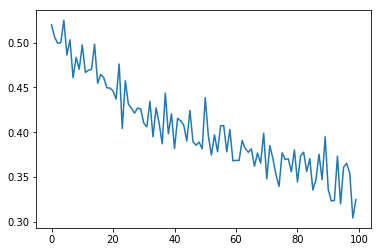

In [36]:
%%time
record1 = {}
train_model(model1, record = record1)
plt.plot(record1['loss_seq'])

In [37]:
%%time
eval_model(model1)
save_model(model1)

train acc 0.8933745726843562
tensor([[4668,  133],
        [ 522,  820]])
test acc 0.7777777777777778
tensor([[222,  20],
        [ 48,  16]])
<bound method Module.train of CNNV2(
  (embed): Embedding(259922, 300)
  (convs1): ModuleList(
    (0): Conv2d(1, 100, kernel_size=(1, 300), stride=(1, 1))
  )
  (dropout): Dropout(p=0.5)
  (conv2): Conv1d(100, 2, kernel_size=(1,), stride=(1,))
)>
save cache model model_cache/model2018-11-25 13-06-55.732564
Wall time: 17.3 s


In [38]:
%%time
model1_10 = create_model(kernel_num = 10, kernel_sizes = (1,), dropout=0.5)

Wall time: 1.52 s


start training


D:\anaconda\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loss: 0.5000582050383091 999/100000
loss: 0.5079974482059478 1999/100000
loss: 0.523402526319027 2999/100000
loss: 0.513785698518157 3999/100000
loss: 0.501201497271657 4999/100000
loss: 0.5157327495664358 5999/100000
loss: 0.5012979766130448 6999/100000
loss: 0.4829517799466848 7999/100000
loss: 0.5435851445794105 8999/100000
loss: 0.5010494329482317 9999/100000
loss: 0.49431532353907826 10999/100000
loss: 0.5007770771682263 11999/100000
loss: 0.5222991785854101 12999/100000
loss: 0.48955520409345626 13999/100000
loss: 0.4829732284173369 14999/100000
loss: 0.5077047287449241 15999/100000
loss: 0.48424089727550745 16999/100000
loss: 0.510057169020176 17999/100000
loss: 0.4860323239266872 18999/100000
loss: 0.48803011438250543 19999/100000
loss: 0.4964217052608728 20999/100000
loss: 0.5180048879757524 21999/100000
loss: 0.492876316100359 22999/100000
loss: 0.48960768539458516 23999/100000
loss: 0.5205423202849925 24999/100000
loss: 0.5031951134987176 25999/100000
loss: 0.465039930291473

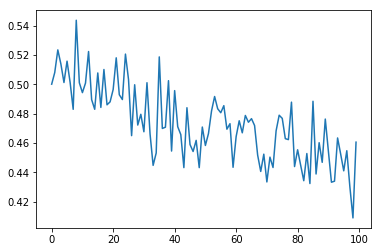

In [39]:
%%time
record1_10 = {}
train_model(model1_10, record = record1_10)
plt.plot(record1_10['loss_seq'])

In [40]:
%%time
eval_model(model1_10)
save_model(model1_10)

train acc 0.7927722611102067
tensor([[4782,   19],
        [1254,   88]])
test acc 0.7843137254901961
tensor([[240,   2],
        [ 64,   0]])
<bound method Module.train of CNNV2(
  (embed): Embedding(259922, 300)
  (convs1): ModuleList(
    (0): Conv2d(1, 10, kernel_size=(1, 300), stride=(1, 1))
  )
  (dropout): Dropout(p=0.5)
  (conv2): Conv1d(10, 2, kernel_size=(1,), stride=(1,))
)>
save cache model model_cache/model2018-11-25 22-43-16.294853
Wall time: 18.3 s
